# Getting Started with Network Analysis in Python
Created by Eric Sims

So, how do we actually make a social network to analyze? We're going to look at three different ways to import files that can be used to create a network.

But first, let's talk about components of a network: Nodes and Edges. If you think of a social network like people who know one another, then the people would be the nodes, and the connections between them would be the edges.

<center><img src=".\images\Simple_Network.png" width=250px></center>

Today we'll talk about 3 different ways to create a network in Python:
* Edgelist
* Adjacency Matrix
* JSON

We are going to use the NetworkX Python library to create, visualize, and analyze some networks.

## Creating Networks

### Edgelists

An edgelist is a list of "Sources" and "Targets" that represent each connection in the network. Here's a super simple edgelist for some characters in Lord of the Rings:

In [82]:
# Import packages
import pandas as pd
import networkx as nx
from networkx.readwrite import json_graph
import json
import matplotlib.pyplot as plt
import pickle

In [2]:
df_edgelist = pd.read_csv('.\data\lotr_edgelist.csv')
df_edgelist

,Source,Target
0,Bilbo,Gandalf
1,Bilbo,Frodo
2,Frodo,Gandalf
3,Frodo,Bilbo
4,Frodo,Merry
5,Merry,Frodo
6,Merry,Gandalf
7,Merry,Treebeard
8,Treebeard,Merry
9,Gandalf,Frodo


Now we can draw this as a network. First, we create the graph object. In NetworkX, graphs are usually called G, so you'll see that a lot in the docs and in StackOverflow. I like more descriptive graph names, but we'll stick with G here to keep things consistent.

We'll create the graph using the "from_pandas_edgelist" function and tell it the source and target columns, which I already named so they'd be easy to find. You could name them anything, though, like "employee" and "co-worker" or "super hero" and "arch-nemesis". They can be used to describe whatever relationships you would like to analyze.

In [3]:
G = nx.from_pandas_edgelist(df_edgelist, source="Source", target="Target")

Next, we'll use the `nx.draw()` function to take a first look at our network. We pass the graph we would like to draw, a position argument `pos` to specify the layout, and whether we'd like to see labels on the nodes.

_Note: There are a lot of different `pos` options you can explore. We're just going to use the circular layout for this one._

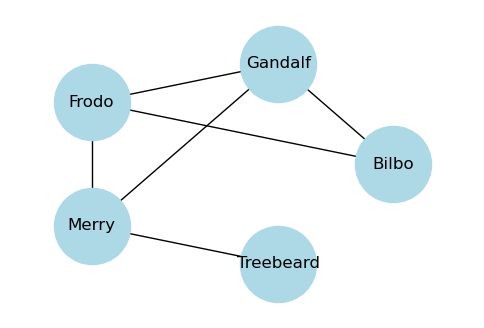

In [15]:
fig = plt.subplots(figsize=(6,4))
plt.margins(.2,.2)
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_color='lightblue', node_size=3000)
plt.show()

### Adjacency Matrix

Another way to make a graph is with a pandas adjacency matrix. An adjacency matrix has the node names across the top and left side and has a number at the intersection of nodes that interact in some way. Here's the adjacency matrix for our LotR network:

In [16]:
# Read in data
df_adj_matrix = pd.read_csv('.\data\lotr_adjacency_matrix.csv')

# Rename first column
df_adj_matrix.rename(columns={'Unnamed: 0':'Nodes'}, inplace=True)

# Set nodes as index
df_adj_matrix.set_index('Nodes', inplace=True)

# Let's have a look...
df_adj_matrix

,Bilbo,Frodo,Gandalf,Merry,Treebeard
Nodes,,,,,
Bilbo,0,1,1,0,0
Frodo,1,0,1,1,0
Gandalf,1,1,0,1,0
Merry,0,1,1,0,1
Treebeard,0,0,0,1,0


A couple of things to notice here:
* The 1's correspond to characters that interacted in the movies
* The diagonal of the matrix is all zeros because we already know that the characters are in the same scenes as themselves. In this particular network, this doesn't add any value.
* Lastly, this matrix is symmetrical along the diagonal. That's because all the edges are "undirected", which means it doesn't matter if Frodo talked to Gandalf or the other way around. We'll see more of that in a moment.

If we draw the adjacency matrix, we'll see it looks pretty much the same as the graph from the pandas edgelist. That's good! It just means you can get the same result when data comes in different formats.

In [22]:
G_adj = nx.from_pandas_adjacency(df_adj_matrix)

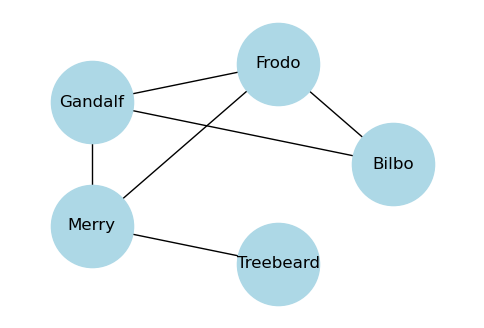

In [23]:
fig = plt.subplots(figsize=(6,4))
plt.margins(.2,.2)
nx.draw(G_adj, pos=nx.circular_layout(G_adj), with_labels=True, node_color='lightblue', node_size=3500)
plt.show()

### JSON

The last way I'll show you how to make a network is from JSON. JSON is a non-tabular format, so it looks a lot different from others we've seen so far. A JSON graph has two sections: Nodes and Links. The first, which you can see below, is the list of nodes, and the second is a list of each of the edges. We can use the JSON library in Python and NetworkX to create a graph from a JSON file, and then we'll draw the graph like we have previously.

Here's what the JSON file looks like:

In [29]:
# Print the JSON file
with open('.\data\lotr_json.json') as f:
    for element in f:
        print(element)

{

 "nodes": [

  {"id": "Bilbo"},

  {"id": "Frodo"},

  {"id": "Gandalf"},

  {"id": "Merry"},

  {"id": "Treebeard"}

 ],

 "links": [

  {"weight": 1, "source": "Bilbo", "target": "Frodo"},

  {"weight": 1, "source": "Bilbo", "target": "Gandalf"},

  {"weight": 1, "source": "Frodo", "target": "Gandalf"},

  {"weight": 1, "source": "Frodo", "target": "Merry"},

  {"weight": 1, "source": "Gandalf", "target": "Merry"},

  {"weight": 1, "source": "Merry", "target": "Treebeard"}

 ]

}


This first function opens the file with the JSON library in Python and then returns a graph. We'll use it to create the `G_json` graph and plot it.

In [37]:
# JSON file to graph
def read_json_file(filename):
    """
    filename : string
        Should be a filepath to a JSON file or a variable assigned to the path

    Example: read_json_file('network_file.json')
    """
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)  # json_graph is from NetworkX

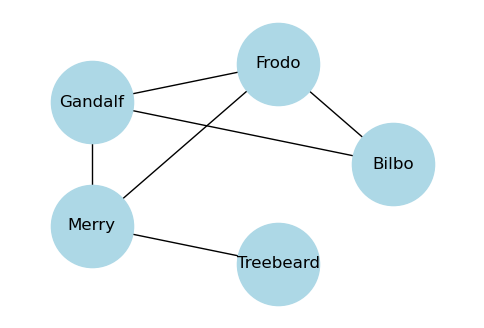

In [38]:
# Create and plot network from JSON file
fig = plt.subplots(figsize=(6,4))
plt.margins(.2,.2)
G_json = read_json_file('.\data\lotr_json.json')
nx.draw(G_json, pos=nx.circular_layout(G_json), with_labels=True, node_color='lightblue', node_size=3500)
plt.show()

So that's how you get started making a graph! One of the challenges is getting the data into the right format so your sources and targets are all lined up. Twitter and Reddit are great places to get network data for projects and wrangling practice.

## What you can learn from a network

One thing I love about networks is how we can see and track motion. We can see direction in a network using a "directed" graph.

Previously, we only saw undirected graphs, which is when you just have a line connecting two nodes. But what if you wanted to show the flow of something, like money? What if Bilbo gave Frodo some money, but Frodo didn't give any back? Then we could represent it with an arrow! When we show the directed flow of material, information, or any other transitive relationship, we call it a directed graph.

Here's an updated edgelist showing who gave money to whom in our Lord of the Rings group.

In [39]:
df_edgelist_directed = pd.read_csv('.\data\lotr_edgelist_directed.csv')
df_edgelist_directed

,Source,Target
0,Bilbo,Gandalf
1,Bilbo,Frodo
2,Merry,Frodo
3,Merry,Gandalf
4,Merry,Treebeard
5,Treebeard,Merry
6,Gandalf,Frodo
7,Gandalf,Merry


And here it is in an adjacency matrix. You can see that our matrix isn't symmetrical anymore, and that's because one intersection of two nodes represents one direction of the relationship, and the other intersection represents the other direction. For example, you can see that Bilbo gave to Frodo, but Frodo didn't give to Bilbo.

In [40]:
# Read in data
df_adj_matrix_directed = pd.read_csv('.\data\lotr_adjacency_matrix_directed.csv')

# Rename first column
df_adj_matrix_directed.rename(columns={'Unnamed: 0':'Nodes'}, inplace=True)

# Set nodes as index
df_adj_matrix_directed.set_index('Nodes', inplace=True)

# Let's have a look...
df_adj_matrix_directed

,Bilbo,Frodo,Gandalf,Merry,Treebeard
Nodes,,,,,
Bilbo,0,1,1,0,0
Frodo,0,0,0,0,0
Gandalf,0,1,0,1,0
Merry,0,1,1,0,1
Treebeard,0,0,0,1,0


When we create this as a directed graph, we add a small piece to our NetworkX function: `create_using=nx.DiGraph()` will create the same graph but with directional orientation to the edges.

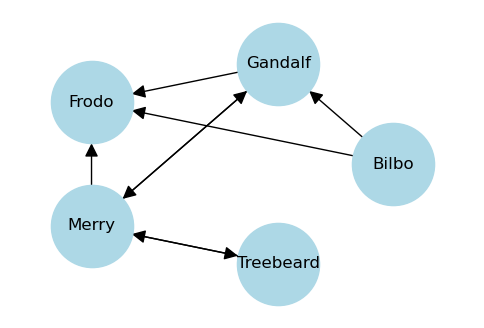

In [44]:
G_dir = nx.from_pandas_edgelist(df_edgelist_directed
                                ,source="Source"
                                ,target="Target"
                                ,create_using=nx.DiGraph())

fig = plt.subplots(figsize=(6,4))
plt.margins(.2,.2)
nx.draw(G_dir
        ,pos=nx.circular_layout(G_dir)
        ,with_labels=True
        ,node_color='lightblue'
        ,node_size=3500
        ,arrowsize=20)
plt.show()

And if we look at the type now, we'll see it's a directed graph object! Cool.

In [47]:
type(G_dir)

networkx.classes.digraph.DiGraph

From this graph we can see that Bilbo and Gandalf tend to give to more people. It also looks like Frodo is a freeloader, but we can't tell who he mooches off the most. We can only see direction, but now we want to see _weight_.

We can use the different amounts of money (or whatever) to create weighted edges are thicker if they represent more of something given. Here's the network with weighted edges:

In [48]:
# Read in data
df_adj_matrix_weighted = pd.read_csv('.\data\lotr_adjacency_matrix_weighted.csv')

# Rename first column
df_adj_matrix_weighted.rename(columns={'Unnamed: 0':'Nodes'}, inplace=True)

# Set nodes as index
df_adj_matrix_weighted.set_index('Nodes', inplace=True)

# Let's have a look...
df_adj_matrix_weighted

,Bilbo,Frodo,Gandalf,Merry,Treebeard
Nodes,,,,,
Bilbo,0,1,1,0,0
Frodo,0,0,0,0,0
Gandalf,0,4,0,1,0
Merry,0,1,2,0,2
Treebeard,0,0,0,1,0


In [50]:
G_wt = nx.from_pandas_adjacency(df_adj_matrix_weighted, create_using=nx.DiGraph())

In [51]:
list(G_wt.edges(data=True))

[('Bilbo', 'Frodo', {'weight': 1}),
 ('Bilbo', 'Gandalf', {'weight': 1}),
 ('Gandalf', 'Frodo', {'weight': 4}),
 ('Gandalf', 'Merry', {'weight': 1}),
 ('Merry', 'Frodo', {'weight': 1}),
 ('Merry', 'Gandalf', {'weight': 2}),
 ('Merry', 'Treebeard', {'weight': 2}),
 ('Treebeard', 'Merry', {'weight': 1})]

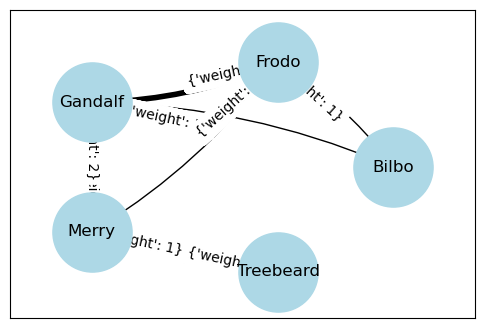

In [53]:
fig = plt.subplots(figsize=(6,4))
plt.margins(.2,.2)

# nx.draw(G, pos=nx.circular_layout(G)
#         ,with_labels=True
#         ,node_color='lightblue'
#         ,node_size=3500
#         ,arrowsize=20)
nx.draw_networkx_nodes(G_wt, pos=nx.circular_layout(G_wt), node_color='lightblue', node_size=3250)
nx.draw_networkx_labels(G_wt, pos=nx.circular_layout(G_wt))

for edge in G_wt.edges(data='weight'):
    nx.draw_networkx_edges(G_wt, pos=nx.circular_layout(G_wt), edgelist=[edge], width=edge[2], label=True, connectionstyle='arc3, rad = 0.1')
    nx.draw_networkx_edge_labels(G_wt, pos=nx.circular_layout(G_wt), label_pos=0.25)
    
    
    # Edge thickness help:
    # https://stackoverflow.com/questions/25128018/change-edge-thickness-based-on-weight

plt.show()

## Understanding importance - Centrality metrics

So we can see weight and direction, but we could see that in a normal dataframe. The cool thing about networks is it can show how things are connected across multiple "hops" from node to node in the network. One way to think of that connectedness is in terms of "centrality", or how important a node or edge is in relation to the whole network.

<center><h2>Traffic flow is a perfect example of centrality!</h2></center>
<center><img src=".\images\hong_kong_traffic.png" width=500></center>

When was the last time there was construction or an accident on the freeway and you and hundreds or even thousands of people were re-routed and stuck in a traffic jam?

That's a perfect example of centrality! That stretch of freeway is a really important edge that you need to go through to make it home as quickly as possible. When that edge is gone, the next shortest path may be MUCH longer.

On the flip side, what if you woke up tomorrow, and the street you grew up on was closed? Would traffic be backed up for miles? Probably not. It would be inconvenient for maybe a few dozen people, and that's it. That road would have a very low centrality.

### Star Wars: The Force is strong with this network

To explore centrality, let's look at the character network in Star Wars, Episode IV. If you'd like to explore other Star Wars episodes, check out [this dataset](https://www.kaggle.com/ruchi798/star-wars) on Kaggle.

The dataset is in JSON format, so we'll use the `read_json_file` to create the network.

In [96]:
# Import data and create graph
star_wars = read_json_file('.\data\starwars-episode-4-interactions-allCharacters.json')
G_sw = nx.Graph(star_wars)

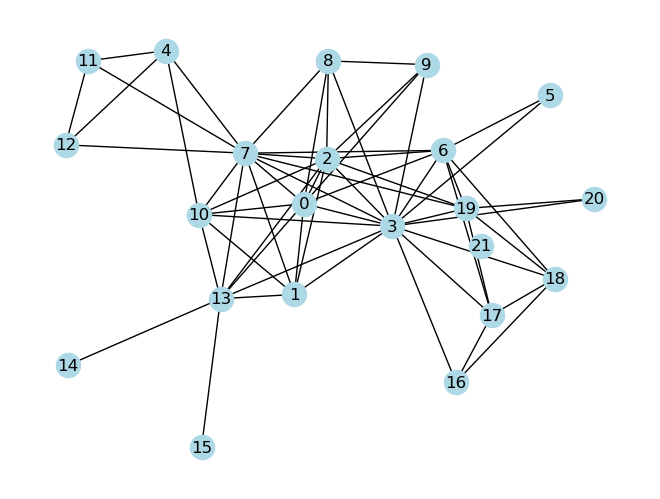

In [107]:
plt.show(nx.draw(G_sw, pos=nx.kamada_kawai_layout(G_sw), with_labels=True, node_color='lightblue'))

This looks like an interesting shape, but the labels aren't very useful to us. Let's look at the node data to see how we could improve it.

In [112]:
# View nodes only
# G_sw.nodes()

# View node details
G_sw.nodes(data=True)

NodeDataView({0: {'name': 'R2-D2', 'value': 40, 'colour': '#bde0f6'}, 1: {'name': 'CHEWBACCA', 'value': 30, 'colour': '#A0522D'}, 2: {'name': 'C-3PO', 'value': 43, 'colour': '#FFD700'}, 3: {'name': 'LUKE', 'value': 89, 'colour': '#3881e5'}, 4: {'name': 'DARTH VADER', 'value': 26, 'colour': '#000000'}, 5: {'name': 'CAMIE', 'value': 4, 'colour': '#808080'}, 6: {'name': 'BIGGS', 'value': 19, 'colour': '#808080'}, 7: {'name': 'LEIA', 'value': 26, 'colour': '#DCDCDC'}, 8: {'name': 'BERU', 'value': 6, 'colour': '#808080'}, 9: {'name': 'OWEN', 'value': 7, 'colour': '#808080'}, 10: {'name': 'OBI-WAN', 'value': 23, 'colour': '#48D1CC'}, 11: {'name': 'MOTTI', 'value': 4, 'colour': '#808080'}, 12: {'name': 'TARKIN', 'value': 13, 'colour': '#808080'}, 13: {'name': 'HAN', 'value': 45, 'colour': '#ff9400'}, 14: {'name': 'GREEDO', 'value': 3, 'colour': '#808080'}, 15: {'name': 'JABBA', 'value': 3, 'colour': '#808080'}, 16: {'name': 'DODONNA', 'value': 4, 'colour': '#808080'}, 17: {'name': 'GOLD LEADE

We can see that each node has a number and a `name` attribute with the charater's name. We might want to re-label those nodes later, but for now, let's just use the `name` attribute as the label.

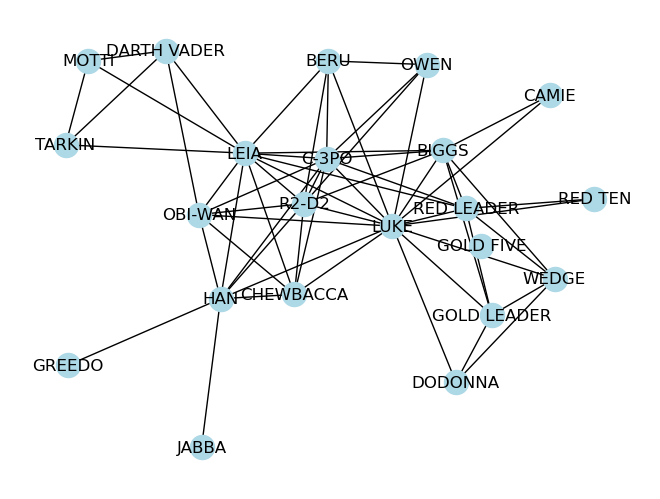

In [110]:
# Use the 'name' attribute as the label for the node.
labels = nx.get_node_attributes(G_sw, 'name')

plt.show(nx.draw(G_sw
                 ,pos=nx.kamada_kawai_layout(G_sw)
                 ,with_labels=True
                 ,node_color='lightblue'
                 ,labels=labels))

Okay, that isn't the prettiest graph, but we can work with it! Let's get some centrality metrics to see who is the most important in the network.

#### Degree Centrality

The first kind of centrality is the most intuitive; it is _Degree Centrality_. It's basically saying, "Of all the nodes in the network, what percentage of them are connected to _this one_?" The actual number of nodes connected to that specific node is the degree. If a node has a high degree centrality, then it has a lot of nodes directly connected to it.

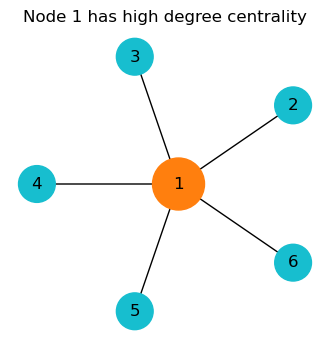

In [93]:
# Degree Centrality Simple Example
# Create dummy data
edgelist = [(1,2),(1,3),(1,4),(1,5),(1,6)] #,(7,8),(8,9),(9,10),(10,11)]

G_dummy = nx.Graph()
G_dummy.add_edges_from(edgelist)

# Assign different color and size to high-degree nodes 
colors = ['C1' if i == 1 else 'C9' for i in G_dummy.nodes]
size = [1400 if i == 1 else 700 for i in G_dummy.nodes]

fig = plt.subplots(figsize=(4,4))
nx.draw_kamada_kawai(G_dummy
                     ,with_labels=True
                     ,node_color=colors
                     ,node_size=size)
plt.title("Node 1 has high degree centrality")
plt.show()

Because every node has a centrality, our output will show every single node, which can be overkill. And because dictionaries are unordered, we can't just take the first 10 elements of the dictionary. So, I made this helper function to filter the top n values from a dictionary. We'll use that as we look at the centralities.

In [113]:
def filter_dict(dict_to_filter, method='top_n', top_n=10, value_cutoff=.01):
    """
    Return a dictionary filtered to either the top n entries sorted by values or
    all entries with values greater than or equal to a specific threshold.
    
    dict_to_filter : dictionary
    
    method : string (default 'top_n', 'value_cutoff')
        Selects whether to filter dictionary by top n values or by specified
        value cutoff.
    
    top_n : integer (default 10)
        The number of key value pairs you want included in the resulting
        filtered dictionary.
    
    value_cutoff : float (default .01)
        If the 'value_cutoff' method is selected, provide a float to filter
        the resulting filtered dictionary.
    
    Examples:
        filter_dict(nx.degree_centrality(G))
        filter_dict(nx.degree_centrality(G), method='value_cutoff')
        filter_dict(nx.degree_centrality(G), top_n=15)
        
    """
    filtered_dict = dict()
    
    if method == 'value_cutoff':
    
        for (key, value) in dict_to_filter.items():
            if value >= value_cutoff:
                filtered_dict[key] = value
        
        # Sort the filtered dict by largest to smallest values
        filtered_dict = dict(sorted(filtered_dict.items()
                                    ,key=lambda x:x[1]
                                    ,reverse=True))
        return filtered_dict
    
    if method == 'top_n':
        filtered_dict = dict(sorted(dict_to_filter.items()
                                    ,key=lambda x:x[1]
                                    ,reverse=True)[0:top_n])
        return filtered_dict

Here are the degrees and degree centrality of the top 10 nodes in Component 3:

In [114]:
print('Top 10 Nodes and their Degrees')
print(dict(sorted(nx.degree(G_sw),key=lambda x:x[1],reverse=True)[0:10]))

print('Top 10 Nodes by Degree Centrality')
print(filter_dict(nx.degree_centrality(G_sw), top_n=5))

Top 10 Nodes and their Degrees
{3: 15, 7: 12, 2: 10, 0: 9, 6: 8, 13: 8, 10: 7, 19: 7, 1: 6, 8: 5}
Top 10 Nodes by Degree Centrality
{3: 0.7142857142857142, 7: 0.5714285714285714, 2: 0.47619047619047616, 0: 0.42857142857142855, 6: 0.38095238095238093}


It's hard to tell which node corresponds to each character here, so we can rename the nodes to get rid of the number and just use the `name` attribute from earlier.

In [115]:
# Relabel nodes to character name
node_names = {}

for i in range(len(G_sw.nodes())):
    node_names[i] = G_sw.nodes[i]['name']

G_sw = nx.relabel_nodes(G_sw, node_names)

In [116]:
print('Top 10 Nodes and their Degrees')
print(dict(sorted(nx.degree(G_sw),key=lambda x:x[1],reverse=True)[0:10]))

print('Top 10 Nodes by Degree Centrality')
print(filter_dict(nx.degree_centrality(G_sw), top_n=5))

Top 10 Nodes and their Degrees
{'LUKE': 15, 'LEIA': 12, 'C-3PO': 10, 'R2-D2': 9, 'BIGGS': 8, 'HAN': 8, 'OBI-WAN': 7, 'RED LEADER': 7, 'CHEWBACCA': 6, 'BERU': 5}
Top 10 Nodes by Degree Centrality
{'LUKE': 0.7142857142857142, 'LEIA': 0.5714285714285714, 'C-3PO': 0.47619047619047616, 'R2-D2': 0.42857142857142855, 'BIGGS': 0.38095238095238093}


Ahh, that's better :)

Does anything about this degree centrality surprise you? The thing that surprises me the most is that Darth Vader didn't even make it into the top 10! There are other types of centrality that might help get at why he is important though.

We can look at the high-degree nodes visually by assigning them a specific color in the graph.

In [118]:
# Create list of top nodes
high_degree_nodes = list(filter_dict(nx.degree_centrality(G_sw), top_n=10))

# Assign different color to high-degree nodes 
colors = ['C1' if i in high_degree_nodes else 'C0' for i in G_sw.nodes]

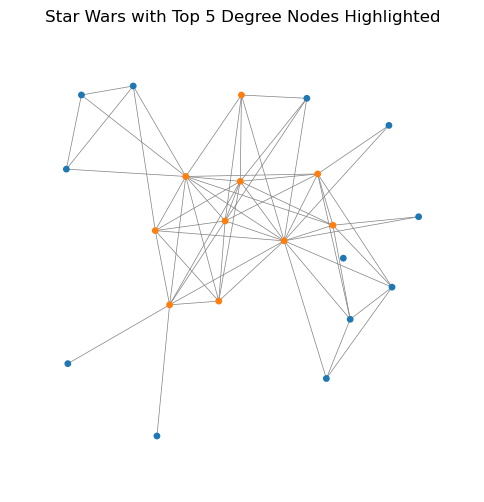

In [119]:
# Plot Star Wars w/ high-degree nodes highlighted
fig = plt.subplots(figsize=(6,6))
plt.margins(.1,.1)

plt.title("Star Wars with Top 5 Degree Nodes Highlighted")
nx.draw(G_sw, pos=nx.kamada_kawai_layout(G_sw), node_size=15, width=.5, node_color=colors, edge_color='gray')
plt.show()

Not surprisingly, because this is a fairly small network, the best-connected individuals are often connected with one another. It's also worth noting that we just took the top 10. If we only took the top 5, we could see a deeper core of the network.

**Bonus:** Another way to see the core of a network is using `nx.k_core`. K-core allows you to specify a degree that you want to see, and then it only shows nodes with at least that degree. I found something cool in this network using k-core of 6:

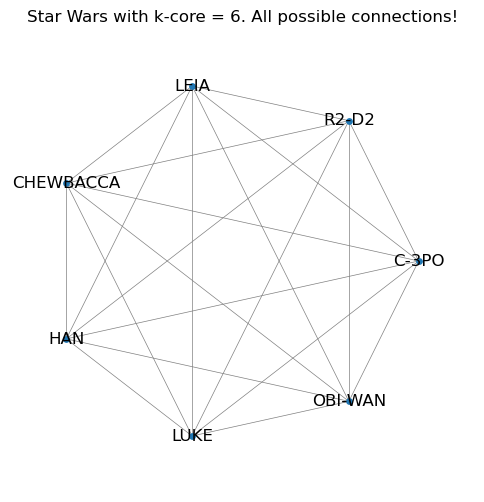

In [143]:
# Plot Star Wars w/ high-degree nodes highlighted
fig = plt.subplots(figsize=(6,6))
plt.margins(.1,.1)

k_core = nx.k_core(G_sw,k=6)

plt.title("Star Wars with k-core = 6. All possible connections!")
nx.draw(k_core
        ,pos=nx.kamada_kawai_layout(k_core)
        ,node_size=15
        ,width=.5
        ,node_color='C0'
        ,edge_color='gray'
        ,with_labels=True)
plt.show()

#### Betweenness Centrality

Another type of centrality is _betweenness centrality_. It's a way of saying, "How many shortest paths go through this node/edge?" In the example of a road being closed on your commute, if it's a really important road and many people use it for their optimal drive home, then that road has a high betweenness!

In [144]:
node_betweenness_centrality = filter_dict(nx.betweenness_centrality(G_sw))
node_betweenness_centrality

{'LUKE': 0.3223922902494331,
 'LEIA': 0.2304988662131519,
 'HAN': 0.1761904761904762,
 'BIGGS': 0.041666666666666664,
 'C-3PO': 0.04064625850340136,
 'RED LEADER': 0.03333333333333334,
 'R2-D2': 0.027551020408163276,
 'OBI-WAN': 0.026643990929705215,
 'DARTH VADER': 0.004761904761904762,
 'BERU': 0.004251700680272109}

We can also look specifically at the edges instead of the nodes to see which roads are the most critical for everyone's drive home. If you work in risk management or city planning, then metrics like this can help you avoid bottlenecks in design.

In [145]:
edge_betweenness_centrality = filter_dict(nx.edge_betweenness_centrality(G_sw))
edge_betweenness_centrality

{('LUKE', 'HAN'): 0.09307359307359307,
 ('HAN', 'GREEDO'): 0.08658008658008658,
 ('HAN', 'JABBA'): 0.08658008658008658,
 ('LEIA', 'MOTTI'): 0.07575757575757576,
 ('LEIA', 'TARKIN'): 0.07575757575757576,
 ('LUKE', 'DODONNA'): 0.07215007215007214,
 ('LUKE', 'RED TEN'): 0.06565656565656566,
 ('LUKE', 'CAMIE'): 0.06349206349206349,
 ('LUKE', 'LEIA'): 0.060863739435168,
 ('LEIA', 'HAN'): 0.056277056277056293}

#### Closeness Centrality

The last centrality we will look at here is _closeness centrality_. If degree centrailty countes the number of people who are very close to you, then you could say that closeness centrality tells you how close you are to everyone else.

In [148]:
closeness_centrality = filter_dict(nx.closeness_centrality(G_sw))
closeness_centrality

{'LUKE': 0.7619047619047619,
 'LEIA': 0.6802721088435374,
 'C-3PO': 0.6349206349206349,
 'R2-D2': 0.6144393241167434,
 'HAN': 0.5952380952380952,
 'OBI-WAN': 0.5772005772005772,
 'CHEWBACCA': 0.5602240896358543,
 'BIGGS': 0.5602240896358543,
 'RED LEADER': 0.5442176870748299,
 'BERU': 0.5148005148005148}

#### BONUS: Eigenvector Centrality

_Eigenvector centrality_ assigns centrality to a node based on the centrality of the nodes it is directly connected to. That means, if a node has important neighbors, it will have high eigenvector centrality.

In [149]:
eigenvector_centrality = filter_dict(nx.eigenvector_centrality(G_sw))
eigenvector_centrality

{'LUKE': 0.4122931287455478,
 'LEIA': 0.3571413194149662,
 'C-3PO': 0.34982381977006505,
 'R2-D2': 0.32425326544693045,
 'OBI-WAN': 0.26312470230417806,
 'BIGGS': 0.2623816053127138,
 'HAN': 0.25970949041668046,
 'CHEWBACCA': 0.2521397781791699,
 'RED LEADER': 0.2249839363539681,
 'BERU': 0.20635361821522366}

In [ ]:
df_gossip_effective = pd.read_csv('.\data\gossip_effective.csv')

G_gossip_effective = nx.from_pandas_edgelist(df_gossip_effective, source="Source", target="Target")

plt.show(nx.draw(G_gossip_effective, pos=nx.kamada_kawai_layout(G_gossip_effective), with_labels=True, node_color=colors, node_size=300))

In [ ]:
colors = ["salmon" if i in (5, 15, 25, 35, 45) else "lightblue"
          for i in G_gossip_effective.nodes]

In [ ]:
df_gossip_ineffective = pd.read_csv('.\data\gossip_ineffective.csv')

G_gossip_ineffective = nx.from_pandas_edgelist(df_gossip_ineffective
                                               ,source="Source"
                                               ,target="Target")

nx.draw(G_gossip_ineffective
        ,pos=nx.kamada_kawai_layout(G_gossip_ineffective)
        ,with_labels=True
        ,node_color='lightblue'
        # ,node_color=colors
        ,node_size=500)
plt.show()

In [ ]:
colors = ["salmon" if i in (5, 15, 25, 35, 45) else "lightblue"
          for i in G_gossip_ineffective.nodes]

In [ ]:
closeness_gossip_effective = filter_dict(nx.closeness_centrality(G_gossip_effective))
print(f"Effective Gossip:\nNode 1 closeness: {closeness_gossip_effective[1]}")

closeness_gossip_ineffective = filter_dict(nx.closeness_centrality(G_gossip_ineffective))
print(f"\nIneffective Gossip:\nNode 1 closeness: {closeness_gossip_ineffective[1]}")

In [ ]:
print(nx.average_shortest_path_length(G_gossip_effective))
print(nx.average_shortest_path_length(G_gossip_ineffective))

In [ ]:
nx.shortest_path_length(G_gossip_effective, source=1, target=47)
# nx.shortest_path(G_gossip_effective, source=1)
# print(nx.shortest_path_length(G_gossip_ineffective))

In [ ]:
colors

In [ ]:
nx.has_bridges(S[0])

In [ ]:
len(list(nx.bridges(nx.k_core(S[3], k=2))))

In [ ]:
fig = plt.subplots(figsize=(8,8))
plt.margins(.1,.1)

nx.draw(nx.k_core(S[3], k=2), pos=nx.kamada_kawai_layout(S[3]), node_size=15, width=.5, edge_color='gray')

In [ ]:
list(nx.algorithms.connectivity.edge_kcomponents.bridge_components(nx.k_core(S[3], k=2)))

In [ ]:
from pyvis.network import Network

# create pyvis Network object
net = Network(height = "600px", width = "800px", notebook = True)

net.from_nx(S[3])
net.show_buttons()
net.show('out1.html')

In [ ]:
conda update decorator

In [ ]:
from pyvis.network import Network

# create pyvis Network object
net = Network(height = "600px", width = "1000px", notebook = True)

G = nx.from_pandas_adjacency(df_adj_matrix_weighted, create_using=nx.DiGraph())

net.from_nx(G)
net.show_buttons()
net.show('out1.html')